In [9]:
pip install tensorflow keras matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Activation
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt

In [11]:
print(tf.__version__)

2.16.1


In [12]:
# Importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialising the CNN
my_model = Sequential()

# Step 1 - Convolution
my_model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Step 2 - Pooling
my_model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer
my_model.add(Conv2D(64, (3, 3), activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a third convolutional layer
my_model.add(Conv2D(64, (3, 3), activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
my_model.add(Flatten())

# Step 4 - Full connection
my_model.add(Dense(128, activation='relu'))
my_model.add(Dense(1, activation='sigmoid'))

# Print model summary
my_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 351,489 (1.34 MB)

 Trainable params: 351,489 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compiling the CNN 
my_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
# Importing necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define directory paths and create data generators
train_dir = r"C:\Users\pooji\Downloads\training_set-20240402T182338Z-001"
test_dir = r"C:\Users\pooji\Downloads\test_set-20240402T180933Z-001"

training_set = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=25, class_mode='binary')
test_set = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=25, class_mode='binary')

# Fit the model
history = my_model.fit(training_set, steps_per_epoch=len(training_set), epochs=25, validation_data=test_set, validation_steps=len(test_set))


Found 790 images belonging to 1 classes.
Found 273 images belonging to 1 classes.
Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - accuracy: 0.8760 - loss: 0.1693 - val_accuracy: 1.0000 - val_loss: 6.7011e-16
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - accuracy: 1.0000 - loss: 3.6057e-18 - val_accuracy: 1.0000 - val_loss: 2.7194e-18
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 1.0000 - loss: 1.3967e-19 - val_accuracy: 1.0000 - val_loss: 2.0782e-18
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 1.0000 - loss: 2.5042e-

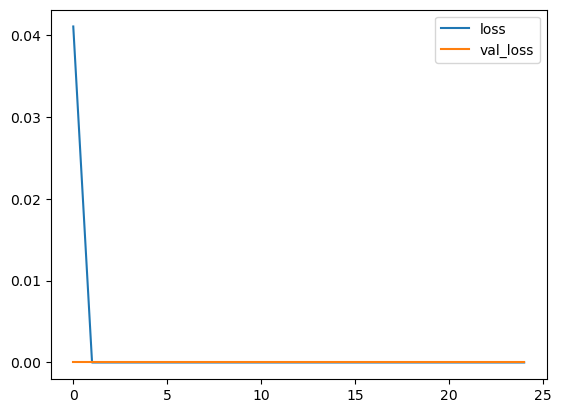

In [6]:
import matplotlib.pyplot as plt

# Plot the Loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


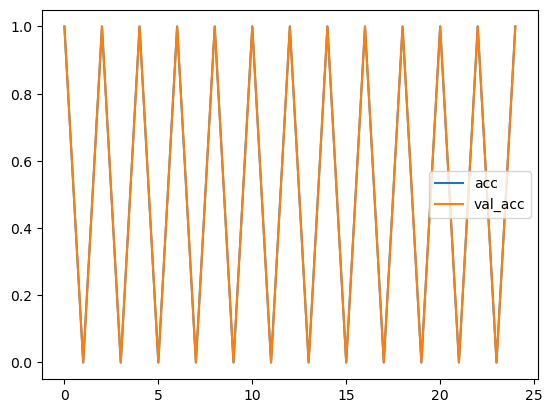

In [7]:
# Plot the Accuracy
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
